# The "Perfect" Release Point: Data collection and initial exploration for starting pitchers
### By: Jonah Charlton


?? what is this notebook doing - remember always to add a description/outline at the top

## Step 1. Setup and importing the data and codebooks

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from IPython.display import HTML, Markdown, display
import seaborn as sns
import numpy as np
import shapely
import json
import plotly

### Load the data

In [3]:
SP_df = pd.read_csv('../data/Original_Data_Files/Starters.csv')

In [4]:
HTML(SP_df.to_html())

,pitches,player_id,player_name,total_pitches,pitch_percent,ba,iso,babip,slg,woba,xwoba,xba,hits,abs,launch_speed,launch_angle,spin_rate,velocity,effective_speed,whiffs,swings,takes,eff_min_vel,release_extension,pos3_int_start_distance,pos4_int_start_distance,pos5_int_start_distance,pos6_int_start_distance,pos7_int_start_distance,pos8_int_start_distance,pos9_int_start_distance,vertical_release_point_ft
0,311,571760,"Heaney, Andrew",2330,13.3,0,0,0,0,0,0.121,0.105,0,307,86.8,20.3,2371,87.1,86.59,105,292,19,-0.5,6.13,112,156,122,148,303,324,293,3.42
1,444,640455,"Manaea, Sean",2980,14.9,0,0,0,0,0,0.137,0.128,0,442,86.7,13.0,1822,88.9,90.37,141,416,28,1.5,7.20,110,151,123,150,300,326,299,3.31
2,359,518516,"Bumgarner, Madison",2294,15.6,0,0,0,0,0,0.136,0.115,0,349,85.1,20.3,2302,85.3,85.29,83,332,27,0.0,6.54,110,153,120,149,298,326,294,3.31
3,395,669373,"Skubal, Tarik",2547,15.5,0,0,0,0,0,0.173,0.150,0,390,87.0,14.6,2052,90.5,90.04,130,371,24,-0.5,6.23,108,154,121,148,300,327,296,2.99
4,378,642232,"Yarbrough, Ryan",2488,15.2,0,0,0,0,0,0.157,0.149,0,371,80.3,17.5,2101,78.9,78.46,84,361,17,-0.4,6.65,106,152,116,149,299,320,290,2.92
5,29,608718,"Suter, Brent",1221,2.4,0,0,0,0,0,0.099,0.098,0,28,78.4,-6.9,2114,85.6,87.15,10,27,2,1.5,7.16,102,150,115,144,299,320,294,2.83
6,136,456034,"Price, David",1178,11.5,0,0,0,0,0,0.157,0.147,0,132,82.2,5.8,1915,89.7,89.34,29,130,6,-0.4,5.95,112,155,116,150,300,316,290,2.79
7,222,676596,"Fleming, Josh",1629,13.6,0,0,0,0,0,0.159,0.150,0,218,82.7,-1.2,1755,87.0,87.22,50,216,6,0.2,6.47,105,153,117,148,303,318,290,2.59
8,166,621368,"Hearn, Taylor",1726,9.6,0,0,0,0,0,0.172,0.155,0,161,85.6,16.7,2175,91.3,90.71,35,154,12,-0.6,6.26,115,154,126,146,303,322,293,2.53
9,459,592662,"Ray, Robbie",3141,14.6,0,0,0,0,0,0.124,0.108,0,457,88.1,20.4,2220,92.4,92.56,162,423,36,0.2,6.43,107,154,122,147,298,319,289,2.53


## Step 2. Examining the data

* What are the dimensions (number of rows and columns)  of the data frame?
* What does each row represent? 
* What do the columns mean?

In [5]:
print("\nWe currently have three (3) pitcher category datasets (SP, RP, CP), but in this dataset we will focus on the SP dataset for starting pitchers")
print("#####")
spRows, spColumns = SP_df.shape
print("\nStarting Pitchers rows: ", spRows, " columns:", spColumns)


print("\nEach row in a Pitcher Category Dataset represents one pitchers' 2021 season summary stats")
print("Each column in a Pitcher Category Dataset represents a different summary statistic for that individual pitcher")


We currently have three (3) pitcher category datasets (SP, RP, CP), but in this dataset we will focus on the SP dataset for starting pitchers
#####

Starting Pitchers rows:  205  columns: 32

Each row in a Pitcher Category Dataset represents one pitchers' 2021 season summary stats
Each column in a Pitcher Category Dataset represents a different summary statistic for that individual pitcher


## Step 3. Cleaning the data
* Rename columns if necessary (e.g. no spaces, reasonable length,  understandable)
* Remove unwanted rows/columns
* Clean data i.e. changing data types where necessary, adding columns etc.
* Save a copy of the cleaned dataframe to the data folder

**Column names are appropriately named**

**Fielders positioning columns are dropped**

**Data is in necessary types**

**Data exported**

In [6]:
cleanSP_df = SP_df.drop(['ba', 'iso', 'babip','slg','woba','hits','pos3_int_start_distance', 'pos4_int_start_distance', 'pos5_int_start_distance', 'pos6_int_start_distance', 'pos7_int_start_distance','pos8_int_start_distance', 'pos9_int_start_distance'], axis =1)
cleanSP_df['horizontal_release_point_ft'] = (-cleanSP_df['vertical_release_point_ft'])

cleanSP_df.to_csv('../data/Clean_Data_Files/SP_df.csv')
cleanSP_df.head(10)

,pitches,player_id,player_name,total_pitches,pitch_percent,xwoba,xba,abs,launch_speed,launch_angle,spin_rate,velocity,effective_speed,whiffs,swings,takes,eff_min_vel,release_extension,vertical_release_point_ft,horizontal_release_point_ft
0,311,571760,"Heaney, Andrew",2330,13.3,0.121,0.105,307,86.8,20.3,2371,87.1,86.59,105,292,19,-0.5,6.13,3.42,-3.42
1,444,640455,"Manaea, Sean",2980,14.9,0.137,0.128,442,86.7,13.0,1822,88.9,90.37,141,416,28,1.5,7.20,3.31,-3.31
2,359,518516,"Bumgarner, Madison",2294,15.6,0.136,0.115,349,85.1,20.3,2302,85.3,85.29,83,332,27,0.0,6.54,3.31,-3.31
3,395,669373,"Skubal, Tarik",2547,15.5,0.173,0.150,390,87.0,14.6,2052,90.5,90.04,130,371,24,-0.5,6.23,2.99,-2.99
4,378,642232,"Yarbrough, Ryan",2488,15.2,0.157,0.149,371,80.3,17.5,2101,78.9,78.46,84,361,17,-0.4,6.65,2.92,-2.92
5,29,608718,"Suter, Brent",1221,2.4,0.099,0.098,28,78.4,-6.9,2114,85.6,87.15,10,27,2,1.5,7.16,2.83,-2.83
6,136,456034,"Price, David",1178,11.5,0.157,0.147,132,82.2,5.8,1915,89.7,89.34,29,130,6,-0.4,5.95,2.79,-2.79
7,222,676596,"Fleming, Josh",1629,13.6,0.159,0.150,218,82.7,-1.2,1755,87.0,87.22,50,216,6,0.2,6.47,2.59,-2.59
8,166,621368,"Hearn, Taylor",1726,9.6,0.172,0.155,161,85.6,16.7,2175,91.3,90.71,35,154,12,-0.6,6.26,2.53,-2.53
9,459,592662,"Ray, Robbie",3141,14.6,0.124,0.108,457,88.1,20.4,2220,92.4,92.56,162,423,36,0.2,6.43,2.53,-2.53


In [7]:
cleanSP_df

,pitches,player_id,player_name,total_pitches,pitch_percent,xwoba,xba,abs,launch_speed,launch_angle,spin_rate,velocity,effective_speed,whiffs,swings,takes,eff_min_vel,release_extension,vertical_release_point_ft,horizontal_release_point_ft
0,311,571760,"Heaney, Andrew",2330,13.3,0.121,0.105,307,86.8,20.3,2371,87.1,86.59,105,292,19,-0.5,6.13,3.42,-3.42
1,444,640455,"Manaea, Sean",2980,14.9,0.137,0.128,442,86.7,13.0,1822,88.9,90.37,141,416,28,1.5,7.20,3.31,-3.31
2,359,518516,"Bumgarner, Madison",2294,15.6,0.136,0.115,349,85.1,20.3,2302,85.3,85.29,83,332,27,0.0,6.54,3.31,-3.31
3,395,669373,"Skubal, Tarik",2547,15.5,0.173,0.150,390,87.0,14.6,2052,90.5,90.04,130,371,24,-0.5,6.23,2.99,-2.99
4,378,642232,"Yarbrough, Ryan",2488,15.2,0.157,0.149,371,80.3,17.5,2101,78.9,78.46,84,361,17,-0.4,6.65,2.92,-2.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,399,458681,"Lynn, Lance",2608,15.3,0.114,0.105,397,86.2,20.1,2383,91.6,91.88,123,367,32,0.3,6.36,-3.09,3.09
201,273,621219,"Mills, Alec",1936,14.1,0.175,0.172,268,84.7,5.3,2144,83.8,83.08,58,256,17,-0.7,6.03,-3.20,3.20
202,451,621244,"Berríos, José",3043,14.8,0.143,0.126,446,85.0,11.8,2145,89.5,88.87,116,404,47,-0.6,6.40,-3.23,3.23
203,417,453286,"Scherzer, Max",2821,14.8,0.113,0.099,414,84.3,20.3,2238,89.2,89.13,167,389,28,-0.1,6.27,-3.27,3.27


## Step 4. Exploring the data
* Examine the distribution (i.e., the range or type of values in the key columns of interest) 
* If relevant visualize the data (e.g. plot a histogram, plot a line graph, etc.) 
* What observations and questions do you have after exploring your data?

To address the first bullet point, it is critical to look at the data range. 

First, we should look at the starting pitcher's release extension (when a pitcher releases a ball that's a few feet closer to home plate = longer release extension can make a 90 mph fastball actually look like a 95+ mph pitch), their average pitch velocity, and horizontal release point (in feet). Horizontal release point will include both positive and negative values — with the positive values meaning the pitcher is right handed and the negative meaning the pitcher is left handed. Zero encodes for the middle of plate and the pitchers who release the ball from a value closer to zero will thus encode for someone who releases from closer to the middle of the plate. 

These are the three metrics that our group plans to largely ananlyze when it comes answering the question of what makes a starting pitcher — someone who pitches for multiple innings, facing the same hitters multiple times — effective.

In [8]:
cleanSP_df.max()

pitches                                  468
player_id                             680686
player_name                    deGrom, Jacob
total_pitches                           3205
pitch_percent                           17.5
xwoba                                  0.211
xba                                    0.191
abs                                      459
launch_speed                            89.7
launch_angle                            28.2
spin_rate                               2809
velocity                                95.8
effective_speed                        97.02
whiffs                                   167
swings                                   434
takes                                     67
eff_min_vel                              1.9
release_extension                       7.44
vertical_release_point_ft               3.42
horizontal_release_point_ft             3.59
dtype: object

In [9]:
cleanSP_df.min()

pitches                                  25
player_id                            425794
player_name                    Akin, Keegan
total_pitches                          1002
pitch_percent                           1.8
xwoba                                 0.078
xba                                   0.071
abs                                      24
launch_speed                           78.4
launch_angle                           -8.5
spin_rate                              1591
velocity                               78.9
effective_speed                       78.46
whiffs                                    5
swings                                   21
takes                                     1
eff_min_vel                           -10.0
release_extension                      5.33
vertical_release_point_ft             -3.59
horizontal_release_point_ft           -3.42
dtype: object

##### Release extension:

Min: 5.33

Max: 7.44

##### Average pitch velocity:

Min: 95.8

Max: 78.9

##### Horizontal release point:

Min: -3.59

Max: 3.42

[Text(0.5, 1.0, 'SP - Horizontal Release Point (for left and right handed pitchers) in ft vs Average Pitch Velocity')]

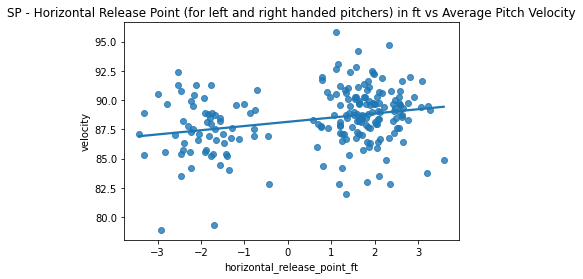

In [10]:
sns.regplot(x="horizontal_release_point_ft", y="velocity", 
            ci=None, 
            data = cleanSP_df).set(title = 'SP - Horizontal Release Point (for left and right handed pitchers) in ft vs Average Pitch Velocity')

In [21]:
cleanSP_df['left_handed']=cleanSP_df['horizontal_release_point_ft']<0

In [23]:
cleanSP_df['horizontal_release_point_ft_ABS'] = cleanSP_df['horizontal_release_point_ft'].abs()

<AxesSubplot:title={'center':'SP - Horizontal Release Point (for left and right handed pitchers) in ft vs Average Pitch Velocity'}, xlabel='horizontal_release_point_ft', ylabel='velocity'>

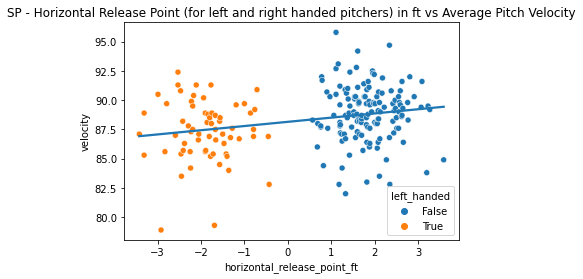

In [26]:
sns.scatterplot(x="horizontal_release_point_ft", y="velocity", 
            hue='left_handed',
            data = cleanSP_df).set(title = 'SP - Horizontal Release Point (for left and right handed pitchers) in ft vs Average Pitch Velocity')

sns.regplot(x="horizontal_release_point_ft", y="velocity", 
            ci=None, scatter=False,
            data = cleanSP_df)

We see a slight positive relationship here, meaning that right handed pitchers with more outside release points than their left handed counterparts have slightly higher velocities. This may be something of note, but we must look at the more important question which is the relationship between horizontal release point and velocity regardless of pitch handedness.

<div class="alert alert-warning">

### Question

* Should left and right picthers be separated?

    
* Looking at a relationship with the negative meaning LEFT isn't really clear what it means
    
    
    
* Shouldn't it be the absolute value?
    
    
* Or consider left and right separately
</div>

[Text(0.5, 1.0, 'SP - Horizontal Release Point (ft) vs Average Pitch Velocity')]

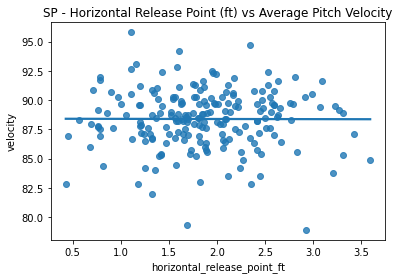

In [12]:
sns.regplot(x=(abs(cleanSP_df['horizontal_release_point_ft'])), y="velocity", ci=None, data = cleanSP_df).set(title = 'SP - Horizontal Release Point (ft) vs Average Pitch Velocity')

Notably, there is not a real relationship between horizontal release point regardless of pitch handedness and average pitch velocity. This is likely because, unlike relievers and closers, starting pitchers have to pitch for an extended period of time and have less variance when it comes to the speed at which they pitch.

[Text(0.5, 1.0, 'SP - Horizontal Release Point (ft) vs Spin Rate')]

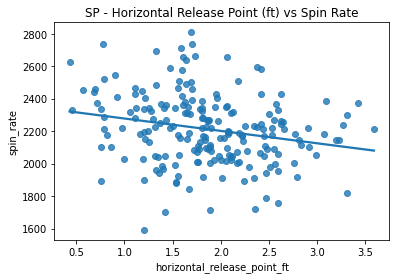

In [13]:
sns.regplot(x=(abs(cleanSP_df['horizontal_release_point_ft'])), y="spin_rate", ci=None, data = cleanSP_df).set(title = 'SP - Horizontal Release Point (ft) vs Spin Rate')

Here we see a negative relationship between horizontal release point and spin rate. This is of interest, as we can see that those pitchers who release the ball from closer to the center of the plate have a higher spin rate. This makes some sense, seeing as though the more extreme horizontal release points will likely create more strain on the arm over the 5+ innings a starting pitcher may pitch for and thus lead to a decreased spin rate.

In [14]:
filt1 = abs(cleanSP_df['horizontal_release_point_ft']) < 0.5
filt2 = cleanSP_df["spin_rate"] < 2600
sp_release = cleanSP_df[filt1 & filt2]
sp_release

,pitches,player_id,player_name,total_pitches,pitch_percent,xwoba,xba,abs,launch_speed,launch_angle,spin_rate,velocity,effective_speed,whiffs,swings,takes,eff_min_vel,release_extension,vertical_release_point_ft,horizontal_release_point_ft
62,357,607644,"Means, John",2328,15.3,0.155,0.137,354,84.4,21.9,2333,86.9,86.46,86,331,26,-0.4,6.14,0.45,-0.45


One starter we should look at is John Means since he throws 86.9 mph on average but posts an average spin rate of 2333, which is an incredibly high rate for that speed, thus making him an outlier. This makes him someone incredibly unique and we would like to further explore his data and the reason for which his release may be so unique.

Derived from the classic term "swing and a miss" the term whiff has to do with when someone swings and misses the ball. We will look at whiffs in this next step.

[Text(0.5, 1.0, 'SP - Horizontal Release Point (ft) vs Spin Rate')]

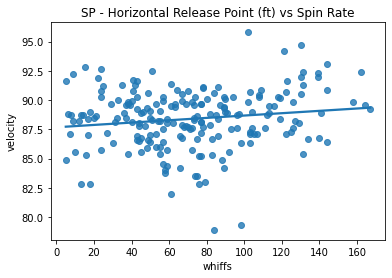

In [15]:
sns.regplot(x="whiffs", y="velocity", ci=None, data = cleanSP_df).set(title = 'SP - Horizontal Release Point (ft) vs Spin Rate')

The slightly positive regression above allows us to show a relationship between the amount of whiffs to average pitch velocity. With a velocity of 90+, a starting pitcher is able to generate more whiffs, which in turn can lead to more strikeouts.

In [16]:
filt4 = cleanSP_df["velocity"] > 95
filt5 = cleanSP_df["whiffs"] > 80
filt6 = cleanSP_df["whiffs"] < 120
sp_whiff = cleanSP_df[filt4 & filt5 & filt6]
sp_whiff

,pitches,player_id,player_name,total_pitches,pitch_percent,xwoba,xba,abs,launch_speed,launch_angle,spin_rate,velocity,effective_speed,whiffs,swings,takes,eff_min_vel,release_extension,vertical_release_point_ft,horizontal_release_point_ft
78,215,594798,"deGrom, Jacob",1226,17.5,0.093,0.082,214,83.8,16.4,2426,95.8,97.02,102,198,17,1.2,6.89,-1.11,1.11


Through a few filtering processes, we are able to pick out Jacob deGrom, who has an incredibly high pitch velocity and fairly high number of whiffs. It also just so happens that deGrom has a fairly tight release point so we will want to see if this is a larger pattern as well.

[Text(0.5, 1.0, 'SP - Release Extension vs Velocity')]

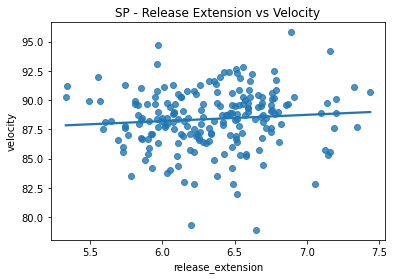

In [17]:
sns.regplot(x="release_extension", y="velocity", ci=None, data = cleanSP_df).set(title = 'SP - Release Extension vs Velocity')

We see a slightly positive relationship between release extension and velocity. This allows us to see those pitchers that are really stretching towards the plate and the speed of their pitches.

In [18]:
filt7 = cleanSP_df["velocity"] < 80.5
filt8 = cleanSP_df["release_extension"] > 6.5
sp_rel = cleanSP_df[filt7 & filt8]
sp_rel

,pitches,player_id,player_name,total_pitches,pitch_percent,xwoba,xba,abs,launch_speed,launch_angle,spin_rate,velocity,effective_speed,whiffs,swings,takes,eff_min_vel,release_extension,vertical_release_point_ft,horizontal_release_point_ft
4,378,642232,"Yarbrough, Ryan",2488,15.2,0.157,0.149,371,80.3,17.5,2101,78.9,78.46,84,361,17,-0.4,6.65,2.92,-2.92


Here we see Ryan Yarbrough come out as someone who has a low velocity but a relatively high release extension and is definitely someone who is now worth exploring more as he does not follow the overall trend line that we see here. He also happens to have a very sidearm-style release point, making him even more intriguing.

# Next steps

In the next step we will explore the following three pitchers in more detail:
- John Means
- Jacob deGrom
- Ryan Yarbrough

We will look to investigate what exactly allows them all to have these differing mechanics but still to thrive against the competition.